# Capítulo 6: Análisis Exploratorio de Datos – Datos de la CONAFOR

En esta _notebook_ se encuentra el procedimiento para la generación de las visualizaciones
y estadísticas de los conjuntos de datos usados para este trabajo de tesis.

***

## Librerías y funciones necesarias

### Librerías

In [1]:
# ==== Manipulación de datos y cómputo científico ==== #
import numpy as np 
import scipy
import pandas as pd

# ==== Manejo de datos vectoriales ==== #
import geopandas as gpd 

# ==== Visualización de datos ==== #
import matplotlib as mpl 
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rc('font', family='serif')
import seaborn as sns

# ==== Visualización de mapas interactivos ==== #
import folium 

In [2]:
# ==== Librerías extras === #
from pySankey.sankey import sankey

### Funciones

In [3]:
# Nombre de meses
def num_month_name(month_number):
    if month_number == 1:
        return 'Enero'
    elif month_number == 2:
        return 'Febrero'
    elif month_number == 3:
        return 'Marzo'
    elif month_number == 4:
        return 'Abril'
    elif month_number == 5:
        return 'Mayo'
    elif month_number == 6:
        return 'Junio'
    elif month_number == 7:
        return 'Julio'
    else:
        return 'Agosto'

### Paleta de colores

In [4]:
List_palette_01 = ['#F2E8CF', '#A7C957', '#6A994E', '#386641', '#99621E', '#8C271E', '#BC4749', '#DD7373', '#2D3047']
List_palette_02_binary = ['#7D4E99', '#6A994E']

## Cargar datos

In [5]:
# Cargar datos de la CONAFOR
df_conafor = gpd.read_file('../datos/CONAFOR/datos_conafor_2017.geojson')
df_conafor['Fecha Inicio'] = pd.to_datetime(df_conafor['Fecha Inicio'])
df_conafor = df_conafor.set_index('Fecha Inicio')
df_conafor.head()

,Duración días,Clave municipio,Municipio,ANP,Tipo de incendio,Tipo impacto,Tipo Vegetación,Causa,Causa especifica,Superficie Salvada,Total,geometry
Fecha Inicio,,,,,,,,,,,,
2017-01-10,2 a 3 Días,79,Tekax,No ANP,Mixto,Impacto Moderado,Selva mediana subcaducifolia - SMS,Cazadores,Ninguna / No aplica,45.726,3.0,POINT (-89.30231 19.78328)
2017-01-22,2 a 3 Días,56,Oxkutzcab,No ANP,Superficial,Impacto Mínimo,Selva baja caducifolia - SBC,Quema de basureros,Ninguna / No aplica,45.726,3.0,POINT (-89.44883 20.26817)
2017-01-25,2 a 3 Días,87,Tetiz,No ANP,Mixto,Impacto Moderado,Selva baja caducifolia - SBC,Otras actividades productivas,Industria,533.470,35.0,POINT (-89.88564 20.97203)
2017-01-26,4 a 7 Días,93,Tixkokob,No ANP,Superficial,Impacto Mínimo,Selva baja caducifolia - SBC,Cazadores,Ninguna / No aplica,335.324,22.0,POINT (-89.39117 20.97625)
2017-01-29,4 a 7 Días,96,Tizimín,Ría Lagartos,Superficial,Impacto Mínimo,Selva baja caducifolia - SBC,Cazadores,Ninguna / No aplica,3246.546,213.0,POINT (-87.74881 21.46289)


In [6]:
# Carga de poligono de Yucatán
yuc_info = gpd.read_file('../datos/31_yucatan/conjunto_de_datos/31ent.shp')
yuc_info = yuc_info.to_crs(4326)
yuc_info

,CVEGEO,CVE_ENT,NOMGEO,geometry
0,31,31,Yucatán,"MULTIPOLYGON (((-92.22410 20.90800, -92.22470 ..."


In [7]:
# Carga polígonos de municipios del estado
municipios_geom_info = gpd.read_file('../datos/31_yucatan/conjunto_de_datos/31mun.shp')
municipios_geom_info = municipios_geom_info.to_crs(4326)
municipios_geom_info.head()

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry
0,31001,31,001,Abalá,"POLYGON ((-89.66875 20.72618, -89.65565 20.711..."
1,31002,31,002,Acanceh,"POLYGON ((-89.45571 20.91324, -89.45216 20.908..."
2,31003,31,003,Akil,"POLYGON ((-89.35315 20.32405, -89.35300 20.323..."
3,31004,31,004,Baca,"POLYGON ((-89.41583 21.22625, -89.40978 21.225..."
4,31005,31,005,Bokobá,"POLYGON ((-89.16865 21.05597, -89.16863 21.055..."


In [8]:
print(f'Se cuentan con {df_conafor.shape[0]} instancias u observaciones')

Se cuentan con 103 instancias u observaciones


## Ubicación de incendios forestales

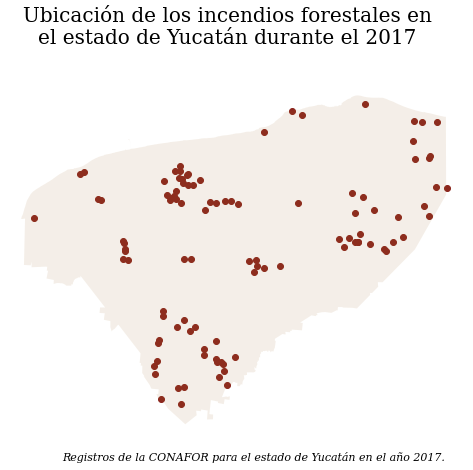

In [9]:
fig,ax=plt.subplots(
    #dpi=150,
    figsize=(10,7)
    )


df_conafor.plot(ax=ax, color=List_palette_01[5])

yuc_info.plot(ax=ax,alpha=0.1, color=List_palette_01[4])
ax.set_xlim(-90.5,-87.4)
ax.set_ylim(19.4,21.8)
ax.axis('off')


fig.suptitle('Ubicación de los incendios forestales en\nel estado de Yucatán durante el 2017', size=20,y=1)
caption = 'Registros de la CONAFOR para el estado de Yucatán en el año 2017.'
fig.text(0.27,0.1,caption, fontdict={'size':11,'style':'italic'})
plt.show()

## Superficie afectada 

In [10]:
print(f'Área afectada por incendios forestales:')

# Estimados de locación
media_AreaAfectada = df_conafor['Total'].mean()
mediana_AreaAfectada = df_conafor['Total'].median()
p = 0.05
media_truncada_AreaAfectada = scipy.stats.trim_mean(df_conafor['Total'],p)

print(f'\nMedia: {round(media_AreaAfectada,3)} ha')
print(f'Mediana: {mediana_AreaAfectada} ha')
print(f'Media truncada (p = {p}): {round(media_truncada_AreaAfectada,3)} ha')

# Estimados de variabilidad
std_AreaAfectada = df_conafor['Total'].std()
asimetria_AreaAfectada = scipy.stats.skew(df_conafor['Total'])

print(f'Desviación estándar: {round(std_AreaAfectada,3)} ha')
print(f'Coeficiente de asimetría: {round(asimetria_AreaAfectada,3)}')
if asimetria_AreaAfectada > 0:
    print(' Conjunto de datos asimétricos hacia la derecha')
else: print('   Conjunto de datos asimétricos hacia la izquierda')

Área afectada por incendios forestales:

Media: 106.878 ha
Mediana: 20.0 ha
Media truncada (p = 0.05): 67.934 ha
Desviación estándar: 217.972 ha
Coeficiente de asimetría: 3.456
 Conjunto de datos asimétricos hacia la derecha


Text(0.37, -0.015, 'Registros de la CONAFOR para el estado de Yucatán en el año 2017.')

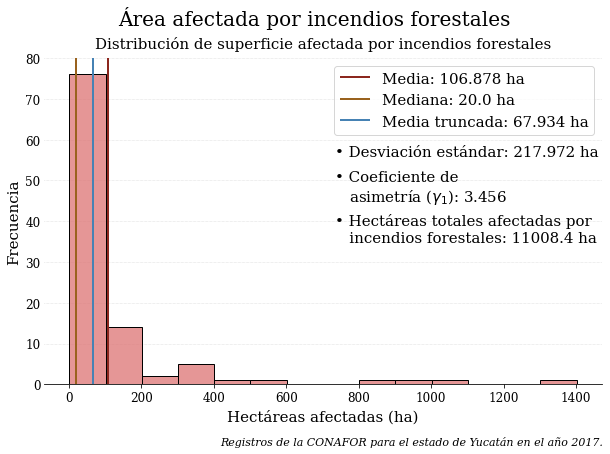

In [11]:
# ==== Histograma (sin separación) 'Total' ==== #

fig,ax = plt.subplots(ncols=1,nrows=1, figsize=(10,6),
               #dpi =150
               )


sns.histplot(data=df_conafor, x='Total',ax=ax, binwidth=100, color=List_palette_01[-2])

# Estadísticas (histograma)
ax.vlines(media_AreaAfectada, 0,85, label=f'Media: {round(media_AreaAfectada,3)} ha', colors=List_palette_01[5], lw=2)
ax.vlines(mediana_AreaAfectada, 0,85, label=f'Mediana: {round(mediana_AreaAfectada,3)} ha', colors=List_palette_01[4],lw=2)
ax.vlines(media_truncada_AreaAfectada, 0,85, label=f'Media truncada: {round(media_truncada_AreaAfectada,3)} ha', colors='steelblue',lw=2)
ax.text(x=735,y=56,s=f'• Desviación estándar: {round(std_AreaAfectada,3)} ha', fontdict={'size':15})
ax.text(x=735,y=45,s=f'• Coeficiente de\n   asimetría ($\gamma_1$): {round(asimetria_AreaAfectada,3)}', fontdict={'size':15})
ax.text(x=735,y=35,s=f'• Hectáreas totales afectadas por\n   incendios forestales: {df_conafor["Total"].sum()} ha', fontdict={'size':15})


ax.set_ylim(0,80)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='y', which='both', length=0)
ax.grid(visible = True, color='silver', alpha=1, ls=':', axis='y', lw=0.5)
ax.set_axisbelow(True)


# Etiquetas
fig.suptitle("Área afectada por incendios forestales",y=1.0, size=20)
ax.set_title(f'Distribución de superficie afectada por incendios forestales',pad=10, fontdict={'size':15})
ax.set_ylabel("Frecuencia",size=15)
ax.set_xlabel("Hectáreas afectadas (ha)", labelpad=5, fontdict={'size':15, 'style':'normal'})
ax.legend(loc='upper right', prop={'size':15})
ax.tick_params(labelsize=12)
caption = 'Registros de la CONAFOR para el estado de Yucatán en el año 2017.'
fig.text(0.37,-0.015,caption, fontdict={'size':11,'style':'italic'})

In [12]:
df_conafor['Si o No ANP'] = df_conafor['ANP'].apply(lambda x: 'No es ANP' if x=='No ANP' else 'Si es ANP')

In [13]:
media_AreaAfectada_ANP = df_conafor.query('ANP != "No ANP"')['Total'].mean()
mediana_AreaAfectada_ANP = df_conafor.query('ANP != "No ANP"')['Total'].median()
std_AreaAfectada_ANP = df_conafor.query('ANP != "No ANP"')['Total'].std()
num_incendios_anp = df_conafor.query('ANP != "No ANP"').shape[0]

print(f'Se registraron {num_incendios_anp} incendios forestales dentro de ANP. Los estimados son:')
print(f'\nMedia: {round(media_AreaAfectada_ANP,3)} ha')
print(f'Desviación estándar: {round(std_AreaAfectada_ANP,3)} ha')
print(f'Mediana: {mediana_AreaAfectada_ANP} ha')
print(f"""Total de área afectada en ANP: {df_conafor.query("ANP != 'No ANP'")["Total"].sum()} ha""")

Se registraron 5 incendios forestales dentro de ANP. Los estimados son:

Media: 528.6 ha
Desviación estándar: 585.096 ha
Mediana: 213.0 ha
Total de área afectada en ANP: 2643.0 ha


/Users/isaacarroyov/miniconda3/envs/GEE/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.35, -0.015, 'Registros de la CONAFOR para el estado de Yucatán en el año 2017.')

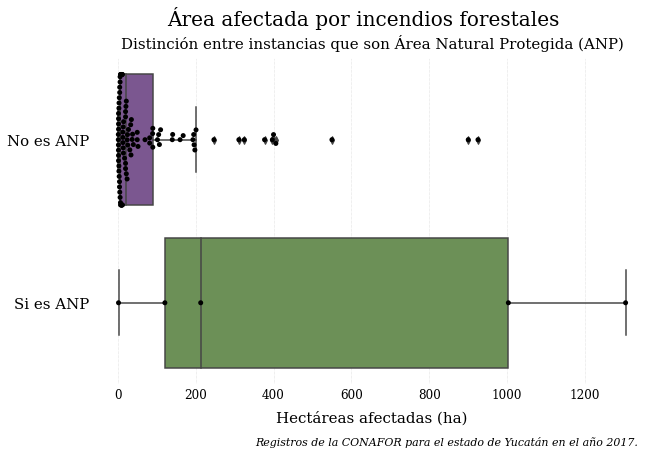

In [14]:
# ==== BOXPLOT (distinción) ==== #

fig,ax = plt.subplots(ncols=1,nrows=1, figsize=(10,6),
               #dpi =150
               )

sns.boxplot(data=df_conafor, x='Total', y='Si o No ANP', ax=ax, palette=List_palette_02_binary)
sns.swarmplot(data=df_conafor, x='Total', y='Si o No ANP', s=5, color='black',ax=ax)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='both', length=0)
ax.grid(visible = True, color='silver', alpha=1, ls=':', axis='x', lw=0.5)
ax.set_axisbelow(True)


fig.suptitle("Área afectada por incendios forestales",y=1, size=20)
ax.set_title("Distinción entre instancias que son Área Natural Protegida (ANP)", fontdict={'size':15}, pad=10)
ax.set_xlabel("Hectáreas afectadas (ha)", labelpad=10, fontdict={'size':15})
ax.set_ylabel('')
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=12)
caption = 'Registros de la CONAFOR para el estado de Yucatán en el año 2017.'
fig.text(0.35,-0.015,caption, fontdict={'size':11,'style':'italic'})

In [15]:
df_conafor[ df_conafor['Total'] == df_conafor['Total'].max() ].T

Fecha Inicio,2017-03-31
Duración días,4 a 7 Días
Clave municipio,61
Municipio,Río Lagartos
ANP,Ría Lagartos
Tipo de incendio,Superficial
Tipo impacto,Impacto Moderado
Tipo Vegetación,Tular - VT
Causa,Otras causas
Causa especifica,Desconocidas
Superficie Salvada,19875.568


### Ambos

In [16]:
df_conafor.describe().T.loc['Total':]

,count,mean,std,min,25%,50%,75%,max
Total,103.0,106.87767,217.971895,1.45,7.0,20.0,103.5,1304.0


### ANP

In [17]:
df_conafor.query('ANP != "No ANP"').describe().T.loc['Total':]

,count,mean,std,min,25%,50%,75%,max
Total,5.0,528.6,585.095975,2.0,121.0,213.0,1003.0,1304.0


## Municipios afectados

Text(0.23, 0.01, 'Registros de la CONAFOR para el estado de Yucatán en el año 2017.')

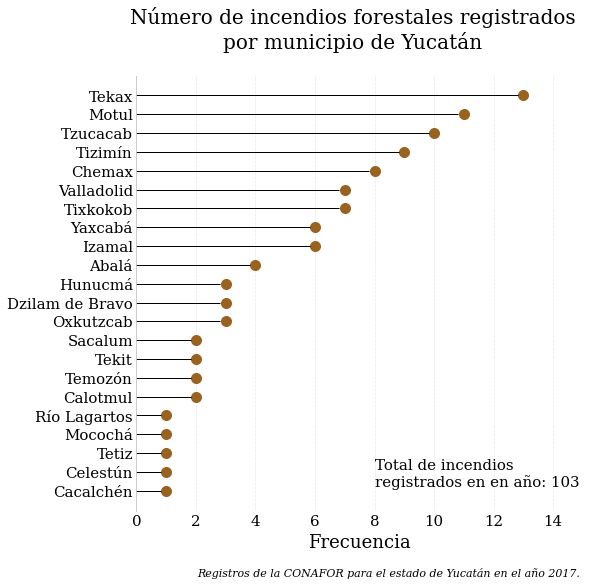

In [18]:
# Agrupar la cuenta de instancias por municipio
# -> Obtener la cuenta y los nombres
lista_municipios_cuenta_nombres = list(df_conafor.groupby('Municipio').count()['Total'].sort_values(ascending=True).index.values)
lista_municipios_cuenta_cuentas = list(df_conafor.groupby('Municipio').count()['Total'].sort_values(ascending=True).values)


fig,ax = plt.subplots(
    figsize=(8,8),
    #dpi = 150
    )

ax.scatter(y= range(len(lista_municipios_cuenta_nombres)),
           x= lista_municipios_cuenta_cuentas,
           s = 100,
           color = List_palette_01[4], 
           alpha=1
           )
ax.hlines(y= range(len(lista_municipios_cuenta_nombres)),
          xmin=0,
          # recortar las líneas para que no se vean dentro de los puntos 
          xmax= list(map(lambda x: x-0.18, lista_municipios_cuenta_cuentas)),
          lw=1,
          colors= 'black', 
          )
ax.set_yticks(list(np.arange(len(lista_municipios_cuenta_nombres))))
ax.set_yticklabels(lista_municipios_cuenta_nombres)

fig.suptitle('Número de incendios forestales registrados\npor municipio de Yucatán', size=20,y=1)
ax.set_xlabel('Frecuencia', size=18, labelpad=5)
ax.tick_params(labelsize=15)
ax.set_xlim(0,15)

ax.grid(visible = True, color='silver', alpha=1, ls=':', axis='x', lw=0.5)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_edgecolor('silver')
ax.tick_params(axis='both', which='both', length=0)
ax.set_axisbelow(True)


#for i in range(len(frecuencias)):
#    ax.text(y=i-0.25,x=frecuencias[i]+0.1,s=f'{round(frecuencias[i]/sum(frecuencias)*100,3)}%', fontdict={'size':13})
#    ax.text(y=i-0.25,x=frecuencias[i]+0.5,s=f'{frecuencias[i]}', fontdict={'size':13})
ax.text(x=8,y=0.23,s=f'Total de incendios\nregistrados en en año: {sum(lista_municipios_cuenta_cuentas)}', fontdict={'size':15})
caption = 'Registros de la CONAFOR para el estado de Yucatán en el año 2017.'
fig.text(0.23,0.01,caption, fontdict={'size':11,'style':'italic'})

Text(0.23, 0.01, 'Registros de la CONAFOR para el estado de Yucatán en el año 2017.')

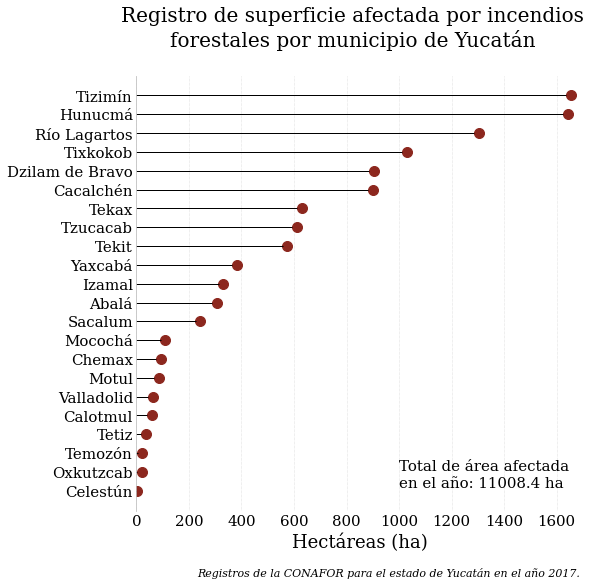

In [19]:
# Agrupar la suma de superficie afectada por municipio
# -> Obtener la suma y los nombres
lista_municipios_suma_nombres = list(df_conafor.groupby('Municipio').sum()['Total'].sort_values(ascending=True).index.values)
lista_municipios_suma_valores = list(df_conafor.groupby('Municipio').sum()['Total'].sort_values(ascending=True).values)



fig,ax = plt.subplots(
    figsize=(8,8),
    #dpi = 150
    )

ax.scatter(y= range(len(lista_municipios_suma_nombres)),
           x= lista_municipios_suma_valores,
           s = 100,
           color = List_palette_01[5], 
           alpha=1
           )
ax.hlines(y= range(len(lista_municipios_suma_nombres)),
          xmin=0,
          # recortar las líneas para que no se vean dentro de los puntos 
          xmax= list(map(lambda x: x-18, lista_municipios_suma_valores)),
          lw=1,
          colors= 'black', 
          )
ax.set_yticks(list(np.arange(len(lista_municipios_suma_nombres))))
ax.set_yticklabels(lista_municipios_suma_nombres)

fig.suptitle('Registro de superficie afectada por incendios\nforestales por municipio de Yucatán', size=20,y=1)
ax.set_xlabel('Hectáreas (ha)', size=18, labelpad=5)
ax.tick_params(labelsize=15)
ax.set_xlim(0,1700)
ax.grid(visible = True, color='silver', alpha=1, ls=':', axis='x', lw=0.5)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_edgecolor('silver')
ax.tick_params(axis='both', which='both', length=0)
ax.set_axisbelow(True)

ax.text(x=1000,y=0.2,s=f'Total de área afectada\nen el año: {sum(lista_municipios_suma_valores)} ha', fontdict={'size':15})
caption = 'Registros de la CONAFOR para el estado de Yucatán en el año 2017.'
fig.text(0.23,0.01,caption, fontdict={'size':11,'style':'italic'})

In [20]:
def mod_clave_municipio(clave):
    if len(str(clave)) == 3:
        return str(clave)
    elif len(str(clave)) == 2:
        return '0'+str(clave)
    else:
        return '00'+str(clave)

# Ajustar la clave de los municipios para hacer merge con la geometría de los municipios
df_conafor['Clave municipio'] = df_conafor['Clave municipio'].apply(mod_clave_municipio)
# Agrupar la suma por C
df_municipios_info_sum = df_conafor.groupby('Clave municipio').sum()

In [21]:
df_municipios_info_sum = pd.merge(left=df_municipios_info_sum, left_index=True, right=municipios_geom_info, right_on='CVE_MUN', how= 'inner')

Text(0.37, 0.07, 'Registros de la CONAFOR para el estado de Yucatán en el año 2017.')

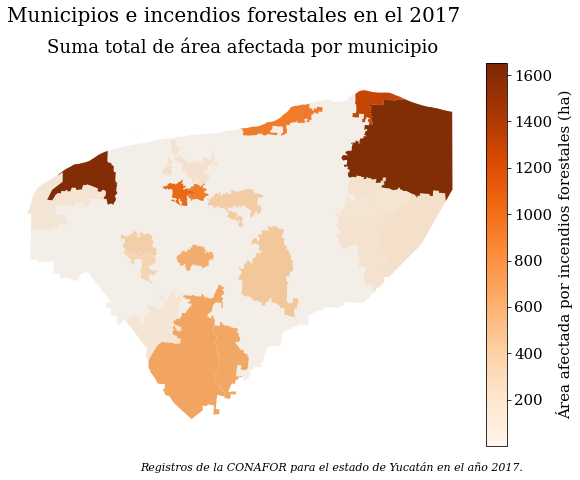

In [22]:
fig,ax= plt.subplots(
    #dpi=150,
    figsize=(10,7)
    )

df_municipios_info_sum.plot('Total', ax=ax, cmap='Oranges')
yuc_info.plot(ax=ax,alpha=0.1, color=List_palette_01[4])
ax.set_xlim(-90.5,-87.4)
ax.set_ylim(19.4,21.8)

ax.axis('off')

# Color Bar
cax = fig.add_axes([0.85,0.12,0.03,0.76])
sm = plt.cm.ScalarMappable(cmap='Oranges', norm= plt.Normalize(vmin=df_municipios_info_sum['Total'].min(), 
                                                               vmax= df_municipios_info_sum['Total'].max())
                           )
cbr = fig.colorbar(sm, cax=cax)

# Etiquetas
fig.suptitle('Municipios e incendios forestales en el 2017',size=20, y=0.99)
ax.set_title('Suma total de área afectada por municipio',size=18,pad=10)
cbr.set_label('Área afectada por incendios forestales (ha)', size=15)
cbr.ax.tick_params(labelsize=15)



caption = 'Registros de la CONAFOR para el estado de Yucatán en el año 2017.'
fig.text(0.37,0.07,caption, fontdict={'size':11,'style':'italic'})

### Tipo de vegetación y Área afectada

In [23]:
df_tipo_vegetacion = df_conafor.groupby('Tipo Vegetación').sum().reset_index().sort_values('Total',ascending=True)
df_tipo_vegetacion

,Tipo Vegetación,Superficie Salvada,Total
0,Petén - PT,30.4840,2.00
3,Selva mediana subcaducifolia - SMS,17981.7495,1179.75
1,Selva baja caducifolia - SBC,26919.6583,1766.15
5,Vegetación Halófila (Hidrófila) - VHH,29386.5760,1928.00
4,Tular - VT,43393.9740,2847.00
2,Selva mediana caducifolia - SMC,50077.5910,3285.50


Text(0.23, 0.01, 'Registros de la CONAFOR para el estado de Yucatán en el año 2017.')

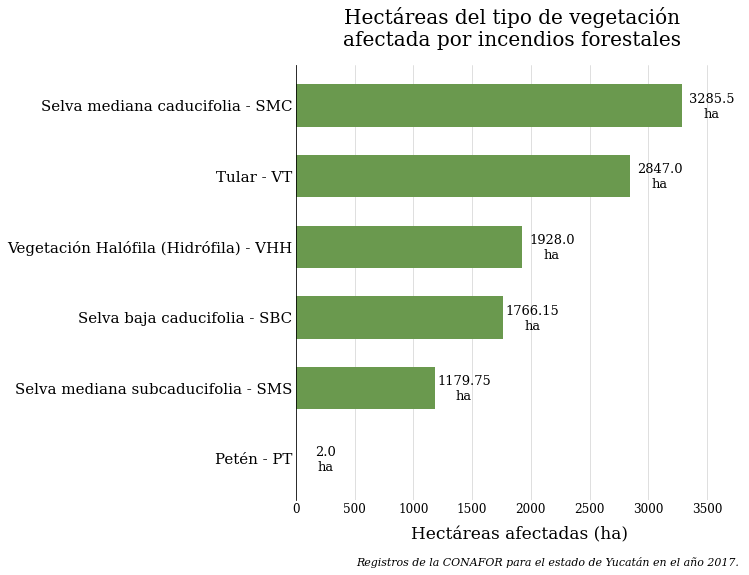

In [24]:
fig,ax = plt.subplots(
    figsize=(8,8),
    #dpi=150
)

ax.barh(y= df_tipo_vegetacion['Tipo Vegetación'], width=df_tipo_vegetacion['Total'],
color= List_palette_01[2],
height = 0.6
)
ax.set_xlim(0,3800)

#fig.suptitle('Hectáreas y porcentaje represetativo de\ntipo de vegetación afectada por incendios forestales', size=20,y=1.01)
fig.suptitle('Hectáreas del tipo de vegetación\nafectada por incendios forestales', size=20,y=0.98)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=12)
ax.set_xlabel('Hectáreas afectadas (ha)',size=17, labelpad=10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='both', which='both', length=0)
ax.grid(visible = True, color='silver', alpha=1, ls='solid', axis='x', lw=0.5)
ax.set_axisbelow(True)

listas_areas_totales = list(df_tipo_vegetacion['Total'])
for i in range(len(listas_areas_totales)):
    ax.text(x=listas_areas_totales[i]+250,y=i-0.17,s=f'{listas_areas_totales[i]}\nha', fontdict={'size':13}, ha='center')

caption = 'Registros de la CONAFOR para el estado de Yucatán en el año 2017.'
fig.text(0.23,0.01,caption, fontdict={'size':11,'style':'italic'})


Text(0.3, 0.08, 'Registros de la CONAFOR para el estado de Yucatán en el año 2017.')

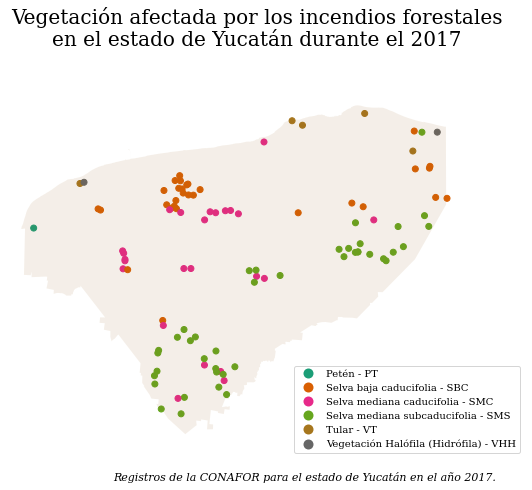

In [25]:
fig,ax= plt.subplots(
    #dpi=150, 
    figsize=(10,7)
    )
df_conafor.plot('Tipo Vegetación', legend=True, cmap='Dark2',ax=ax, 
                legend_kwds = {
                    'loc':'lower right',
                    'prop':{
                        'size':10
                            }
                              }
                )
yuc_info.plot(ax=ax,alpha=0.1, color=List_palette_01[4])
ax.set_xlim(-90.5,-87)
ax.set_ylim(19.4,21.8)

ax.axis('off')


fig.suptitle('Vegetación afectada por los incendios forestales\nen el estado de Yucatán durante el 2017',
            size=20, y=1.02)
ax.set_xlabel('Longitud',size=15, labelpad= 10)
ax.set_ylabel('Latitud',size=15, rotation='horizontal',labelpad=45)
ax.tick_params(labelsize=13)

caption = 'Registros de la CONAFOR para el estado de Yucatán en el año 2017.'
fig.text(0.3,0.08,caption, fontdict={'size':11,'style':'italic'})

## Temporada de incendios forestales

In [26]:
# Agrupar por meses
df_conafor_month_sum = df_conafor.resample('M').sum()
df_conafor_month_sum['Ocurrencias']= df_conafor.resample('M').count()['ANP'].values
df_conafor_month_sum['Mes'] = df_conafor_month_sum.index.month
df_conafor_month_sum['MesNum'] = df_conafor_month_sum.index.month
df_conafor_month_sum['Mes'] = df_conafor_month_sum['Mes'].apply(num_month_name)
df_conafor_month_sum['Area Afectada por Ocurrencia'] = df_conafor_month_sum['Total'] / df_conafor_month_sum['Ocurrencias']
df_conafor_month_sum = df_conafor_month_sum.dropna()
df_conafor_month_sum = df_conafor_month_sum.sort_values('MesNum', ascending=False)

Text(0.375, -0.08, 'Registros de la CONAFOR para el estado de Yucatán en el año 2017.')

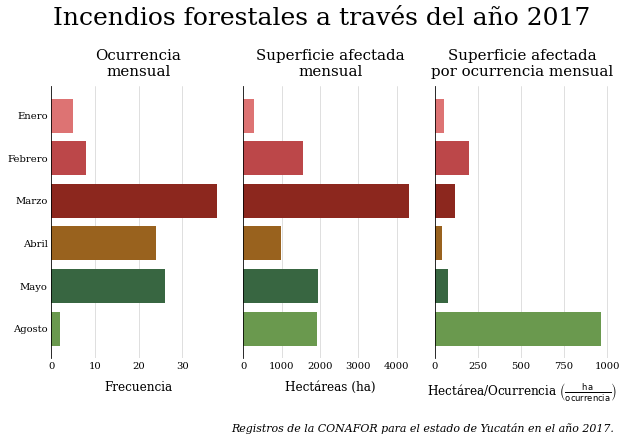

In [27]:
fig,(ax1,ax2,ax3) = plt.subplots(
    ncols=3,
    nrows=1,
    figsize = (10,5),
    #dpi = 150,
    sharey=True
    )
fig.subplots_adjust(wspace=0.1)

ax1.barh(y=df_conafor_month_sum['Mes'], width= df_conafor_month_sum['Ocurrencias'], color=List_palette_01[2:])
ax2.barh(y=df_conafor_month_sum['Mes'], width= df_conafor_month_sum['Total'], color=List_palette_01[2:])
ax3.barh(y=df_conafor_month_sum['Mes'], width= df_conafor_month_sum['Area Afectada por Ocurrencia'], color=List_palette_01[2:])


ax1.set_xlabel('Frecuencia', labelpad=10, size=12)
ax2.set_xlabel('Hectáreas (ha)', labelpad=10, size=12)
ax3.set_xlabel(r'Hectárea/Ocurrencia $\left( \mathrm{\frac{ha}{ocurrencia}} \right)$', labelpad=10, size=12)

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax3.spines['bottom'].set_visible(False)


ax1.tick_params(axis='both', which='both', length=0)
ax2.tick_params(axis='both', which='both', length=0)
ax3.tick_params(axis='both', which='both', length=0)
ax1.grid(visible = True, color='silver', alpha=1, ls='solid', axis='x', lw=0.5)
ax2.grid(visible = True, color='silver', alpha=1, ls='solid', axis='x', lw=0.5)
ax3.grid(visible = True, color='silver', alpha=1, ls='solid', axis='x', lw=0.5)
ax1.set_axisbelow(True)
ax2.set_axisbelow(True)
ax3.set_axisbelow(True)


fig.suptitle('Incendios forestales a través del año 2017',size=25,y=1.1)
ax1.set_title('Ocurrencia\nmensual', pad=10, size=15)
ax2.set_title('Superficie afectada\nmensual',pad=10, size=15)
ax3.set_title('Superficie afectada\npor ocurrencia mensual', pad=10, size=15)



caption = 'Registros de la CONAFOR para el estado de Yucatán en el año 2017.'
fig.text(0.375,-0.08,caption, fontdict={'size':11,'style':'italic'})


In [28]:
df_conafor.loc['2017-08']

,Duración días,Clave municipio,Municipio,ANP,Tipo de incendio,Tipo impacto,Tipo Vegetación,Causa,Causa especifica,Superficie Salvada,Total,geometry,Si o No ANP
Fecha Inicio,,,,,,,,,,,,,
2017-08-15,Mayor de 7 Días,038,Hunucmá,No ANP,Mixto,Impacto Moderado,Vegetación Halófila (Hidrófila) - VHH,Cazadores,Ninguna / No aplica,14098.850,925.0,POINT (-89.98068 21.13977),No es ANP
2017-08-19,4 a 7 Días,096,Tizimín,Ría Lagartos,Mixto,Impacto Moderado,Vegetación Halófila (Hidrófila) - VHH,Cazadores,Ninguna / No aplica,15287.726,1003.0,POINT (-87.59309 21.45594),Si es ANP


# Visualizaciones extra

## Relación entre variables: Causa – Tipo de incendio (Anexo)

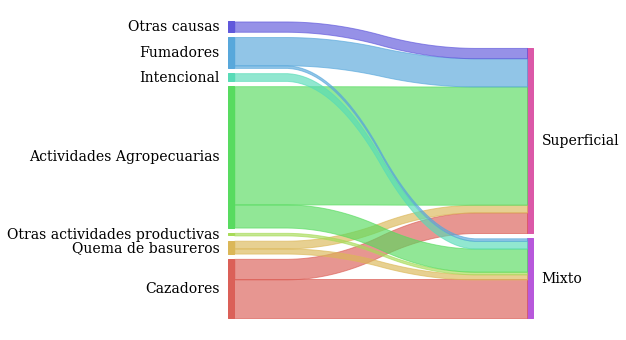

In [29]:
sankey(left=df_conafor['Causa'], right=df_conafor['Tipo de incendio'])

## Relación entre variables: Tipo de incendio – Tipo de vegetación (Anexo) 

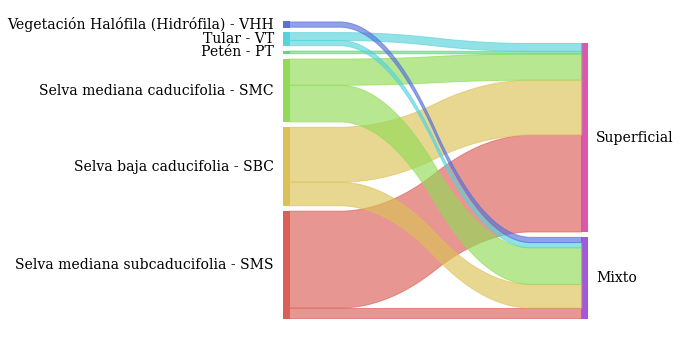

In [30]:
sankey(left=df_conafor['Tipo Vegetación'], right= df_conafor['Tipo de incendio'])